Object detection using Haar Cascades to blur license plates detected in an image

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function to display images
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img,cmap=cmap)

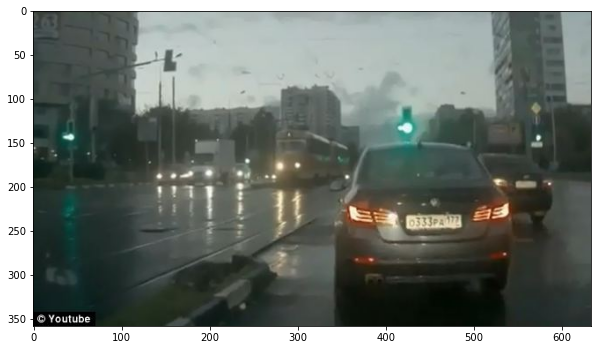

In [3]:
img = cv2.imread('car_plate.jpg')
display(img)

In [4]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [5]:
def detect_plate(img):

    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,0,0), 4) 
        
    return plate_img

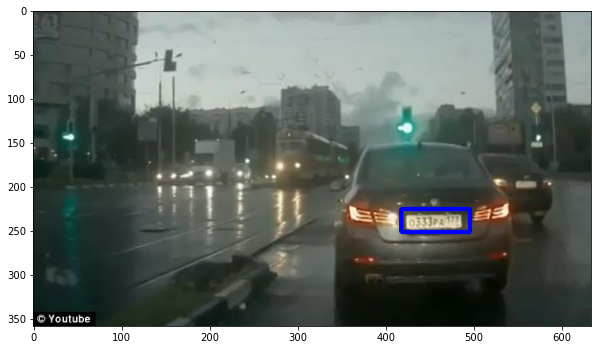

In [6]:
result = detect_plate(img)
display(result)

In [7]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img

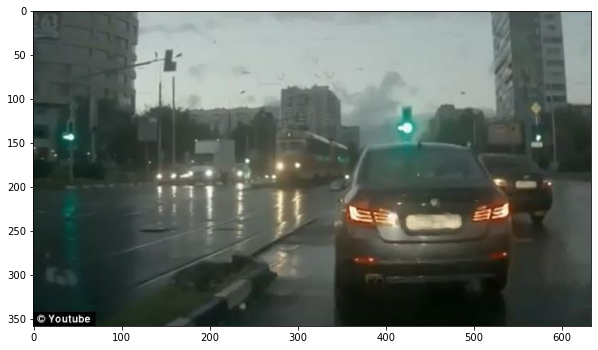

In [8]:
result = detect_and_blur_plate(img)
display(result)